
# Project: TMDb data analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**About TMDb dataset**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb).

This dataset has the following 21 features about each movie :

<ul>
<li>id</li>
<li>imdb_id</li>
<li>popularity</li>
<li>budget</li>
<li>revenue</li>
<li>original_title</li>
<li>cast</li>
<li>homepage</li>
<li>director</li>
<li>tagline</li>
<li>keywords</li>
<li>overview</li>
<li>runtime</li>
<li>genres</li>
<li>production_companies</li>
<li>release_date</li>
<li>vote_count</li>
<li>vote_average</li>
<li>release_year</li>
<li>budget_adj :  show the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
<li>revenue_adj: show the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>

In [1]:
# import needed libs
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

### Questions to answer :
* What is the most popular movie in this dataset ? from which genres ? <a href="#ans1">Answer here</a>
* What is the scope of years in which these movies released ? How many movies released each year ? <a href="#ans2">Answer here</a>
* Which genres are most popular from year to year? <a href="#ans3">Answer here</a>
* What are the ***romantic and action*** movies that **Jason Statham** has role in them ?<a href="#ans4">Answer here</a>
* What are the production companies and the cast of the top 10 popular romance/action movies ? <a href="#ans5">Answer here</a>
* What kinds of properties are associated with movies that have high revenues? <a href="#ans6">Answer here</a>

<a id='wrangling'></a>
## Data Wrangling

In [16]:
# load movie data and show first few rows
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### General Properties

In [17]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

This dataset has exactly 10866 movies

**Missing data is existed in these features** :
* imdb_id
* cast
* homepage
* director
* tagline
* keywords
* overview
* genres
* production_companies

Multiple-values columns are :
* genres              
* production_companies
* keywords
* cast


We have multiple options here in order to deal with these columns :
1. split these values and make a single value only per row (this will be efficent for search but will have many rows per movie) ***(used option)***
2. leave these columns as they are and use string splitting as a test for membership (inefficent in terms of performace)
3. apply first normal form (database normalization) and create different dataframe for each column

Now let's keep the columns of interest and drop the rest of them
* since we will not conduct any textual analysis here, features like tagline, keywords and overview are out of the scope of this analysis
* and since this data is collected from TMDb and we will not deal with IMDB data, we will remove their ID column
* and for homepage column we don't need it here

We don't need any data convenversion so far

In [18]:
# drop the columns we don't need
cols_to_remove = ['imdb_id','homepage','tagline','keywords','overview']
movie_df.drop(cols_to_remove,axis = 1,inplace=True)
# show dataset after this droping
movie_df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Data Cleaning

#### Dealing with missing data



In [19]:
# show missing data in each feature
movie_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Missing Data are existed now in :
* cast
* director
* genres
* production_companies

And since all these features are catagorical and mostly we can't impute them so we will drop these rows

In [20]:
# drop missing data rows
movie_df.dropna(inplace=True)

In [21]:
# confirm that missing data is droped
movie_df.isnull().sum().any()

False

#### Check for duplicate data

In [22]:
# show the count of duplicated rows
movie_df.duplicated().sum()

1

In [23]:
# show the duplicated movie
movie_df[movie_df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [24]:
# drop duplicated row
movie_df.drop_duplicates(inplace=True)

In [26]:
# confirm that duplicated data is gone
movie_df[movie_df.duplicated()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [28]:
# add gross profit feature which will be revenue - budget
movie_df['gross_profit'] = movie_df['revenue'] - movie_df['budget']
movie_df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201


In [30]:
# a function that takes a dataframe and sort it with gross_profit
def sort_by_gross_profit(df):
    '''
    Takes a pandas dataframe and sort it by gross_profit in descending order
    Returns : the sorted dataframe
    '''
    return df.sort_values(by='gross_profit',ascending=False)

In [31]:
# let's take a look at Top-Grossing Movies
sort_by_gross_profit(movie_df).head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


#### Dealing with multiple-values columns

Multiple-values columns are now :

* genres
* production_companies
* cast

as discussed earlier we will split these values and make a single value only per row (this will be efficent for search but will make muliple rows per movie)

In [32]:
# split multiple-values columns and make a single value only per row
# first take a copy of dataframe
df = movie_df.copy()

In [33]:
# convert these multiple values to a list of values
multi_cols = ['genres','production_companies','cast']
for col in multi_cols:
    df[col] = df[col].apply(lambda x:x.split('|'))

apply the tequnique that mentioned in this blog post https://www.mikulskibartosz.name/how-to-split-a-list-inside-a-dataframe-cell-into-rows-in-pandas

***Process Explained***

This process will convert the list based column to a pandas Series object at first , then merge this series with original dataframe  ,then drop the original column , then apply melt() with id_vars equal to all the columns except the original column and value_vars equal to original column, this will add a new column to dataframe called variable which will be droped and then drop all the rows that has null values for the new column  

In [34]:
# make genres column a single value per row

# make a list of id_vars column which will be used in melt()
id_vars_1 = [col for col in df.columns if col != 'genres']
# apply the process on genres column
df = df.genres.apply(pd.Series).merge(df,left_index = True, right_index = True).drop(["genres"], axis = 1) \
.melt(id_vars = id_vars_1, value_name = "genres").drop("variable", axis = 1).dropna()

In [35]:
# show dataframe after changes
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit,genres
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Action


In [36]:
# show dataframe size after changes
df.shape

(24650, 17)

In [37]:
# make production_companies column a single value per row

# make a list of id_vars column which will be used in melt()
id_vars_2 = [col for col in df.columns if col != 'production_companies']
# apply the process on production_companies column
df = df.production_companies.apply(pd.Series).merge(df,left_index = True, right_index = True).drop(["production_companies"], axis = 1) \
.melt(id_vars = id_vars_2, value_name = "production_companies").drop("variable", axis = 1).dropna()

In [38]:
# show dataframe after changes
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit,genres,production_companies
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Action,Universal Studios


In [39]:
# show dataframe size after changes
df.shape

(58961, 17)

In [40]:
# make cast column a single value per row

# make a list of id_vars column which will be used in melt()
id_vars_3 = [col for col in df.columns if col != 'cast']
# apply the process on cast column
df = df.cast.apply(pd.Series).merge(df,left_index = True, right_index = True).drop(["cast"], axis = 1) \
.melt(id_vars = id_vars_3, value_name = "cast").drop("variable", axis = 1).dropna()

In [41]:
# show dataframe after changes
df.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit,genres,production_companies,cast
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,Action,Universal Studios,Chris Pratt


In [42]:
# show dataframe size after changes
df.shape

(292245, 17)

In [43]:
# show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292245 entries, 0 to 294804
Data columns (total 17 columns):
id                      292245 non-null int64
popularity              292245 non-null float64
budget                  292245 non-null int64
revenue                 292245 non-null int64
original_title          292245 non-null object
director                292245 non-null object
runtime                 292245 non-null int64
release_date            292245 non-null object
vote_count              292245 non-null int64
vote_average            292245 non-null float64
release_year            292245 non-null int64
budget_adj              292245 non-null float64
revenue_adj             292245 non-null float64
gross_profit            292245 non-null int64
genres                  292245 non-null object
production_companies    292245 non-null object
cast                    292245 non-null object
dtypes: float64(4), int64(7), object(6)
memory usage: 40.1+ MB


#### Conclusion about the approch used to deal with multiple-values column
After applying option number 1 with multi-values column it sound that dataframe has increased dramatically in size from 10866 rows or less to 292245 rows and memory usage from 1.7+ MB or less to 40.1+ MB

<a id='eda'></a>
## Exploratory Data Analysis

### General Exploration

In [25]:
# apply descriptive statistics
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,63189.640810,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,90718.059987,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10221.500000,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,70577.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


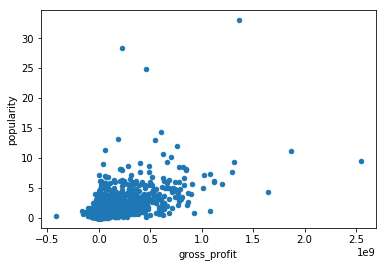

In [47]:
# let's show relationship between variables
# is there a relationship between gross_profit and popularity ?
movie_df[['gross_profit','popularity']].plot(kind='scatter',x='gross_profit',y='popularity');

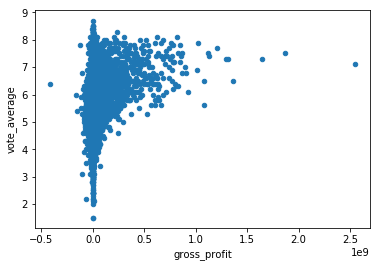

In [48]:
# is there a relationship between gross_profit and vote_average ?
movie_df[['gross_profit','vote_average']].plot(kind='scatter',x='gross_profit',y='vote_average');

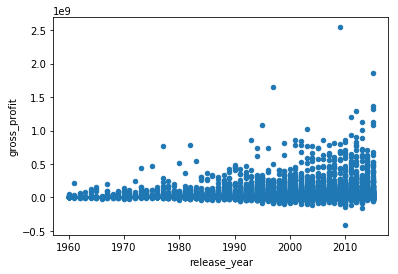

In [51]:
# is there a relationship between gross_profit and release_year ?
movie_df[['gross_profit','release_year']].plot(kind='scatter',y='gross_profit',x='release_year');

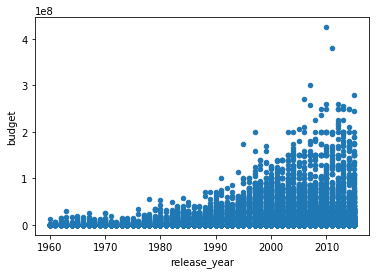

In [52]:
# is there a relationship between budget and release_year ?
movie_df[['budget','release_year']].plot(kind='scatter',y='budget',x='release_year');

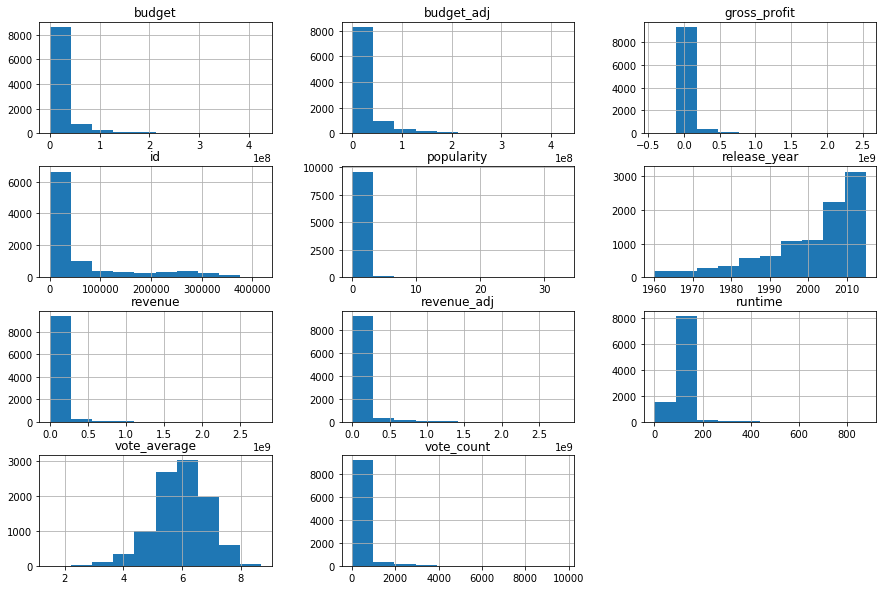

In [56]:
# show dataset distribution
movie_df.hist(figsize=(15,10));

# ! budget , revenue and runtime have minimum of zero (for further research)

<a id="ans1"></a>
### Research Question 1 ( What is the most popular movie in this dataset ? from which genres ? )

In [57]:
# find out the most popular movie
movie_df[movie_df['popularity'] == movie_df.popularity.max()]['original_title'][0]

'Jurassic World'

In [58]:
# find out its genres
movie_df[movie_df['popularity'] == movie_df.popularity.max()]['genres'][0].split('|')

['Action', 'Adventure', 'Science Fiction', 'Thriller']

### Answer to question 1
***Jurassic World*** is the most popular movie in this dataset and its genres are:
* Action
* Adventure
* Science Fiction
* Thriller

<a id="ans2"></a>
### Research Question 2  ( What is the scope of years in which these movies released ? How many movies released each year ? )

In [59]:
# get the most recent release_year
movie_df.release_year.max()

2015

In [60]:
# get the most oldest release_year
movie_df.release_year.min()

1960

In [61]:
# calculate the range of release_year
movie_df.release_year.max() - movie_df.release_year.min()

55

### This dataset has range of movies released from ***1960 to 2015*** 
so let's see how many movies released each year in these ***55 years***

In [62]:
# show the count of movies released every year
movie_df.groupby('release_year').original_title.count()

release_year
1960     32
1961     30
1962     30
1963     34
1964     41
1965     34
1966     44
1967     36
1968     37
1969     29
1970     40
1971     55
1972     37
1973     55
1974     44
1975     42
1976     46
1977     55
1978     61
1979     56
1980     73
1981     78
1982     80
1983     77
1984     99
1985    106
1986    109
1987    113
1988    132
1989    128
1990    126
1991    125
1992    126
1993    172
1994    174
1995    170
1996    196
1997    180
1998    191
1999    212
2000    196
2001    212
2002    241
2003    254
2004    253
2005    323
2006    350
2007    389
2008    441
2009    474
2010    420
2011    456
2012    498
2013    567
2014    635
2015    558
Name: original_title, dtype: int64

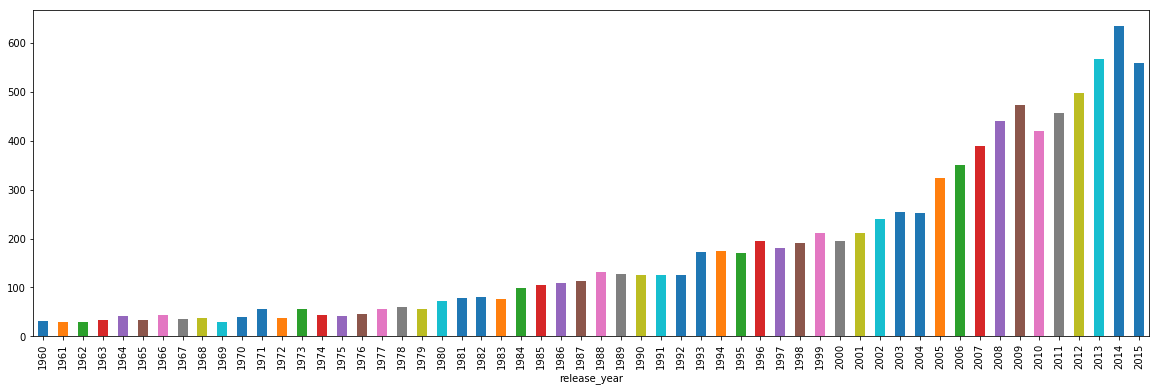

In [63]:
# visualize the count of movies released every year
movie_df.groupby('release_year').original_title.count().plot.bar(figsize=(20,6));

<a id="ans3"></a>
### Research Question 3  ( Which genres are most popular from year to year? )

First things first let's see what genres we have in this cleaned dataset

In [64]:
# find out which genres we have so far
df['genres'].value_counts().count()

20

We have only 20 genres which are :

In [65]:
df['genres'].value_counts()

Drama              53243
Comedy             37053
Thriller           35797
Action             28467
Romance            18181
Horror             17522
Crime              17059
Adventure          16907
Science Fiction    13523
Family             10940
Fantasy            10056
Mystery            10001
Animation           5835
History             4262
Music               3585
War                 3509
Documentary         2428
Western             1679
Foreign             1147
TV Movie            1051
Name: genres, dtype: int64

Apparently and according to this dataset after cleaning there are a lot movies from ***Drama, Comedy, Thriller, Action and Romance*** genres

so let's see the popularity of each genres over time, we can extend the analysis to more genres but we will limit the analysis to these top 5 genres

***Intuition*** : the more popular the genre, the more movies are released in that genre

***Drama genre popularity over years from 1960 to 2015***

In [66]:
# show how many Drama movies released each year
df[df['genres'] == "Drama"].release_year.value_counts().sort_index()

1960      80
1961     125
1962     140
1963      99
1964     153
1965     165
1966     135
1967     140
1968     200
1969     115
1970     160
1971     260
1972     137
1973     280
1974     180
1975     185
1976     225
1977     180
1978     220
1979     250
1980     265
1981     283
1982     291
1983     269
1984     380
1985     362
1986     441
1987     450
1988     452
1989     525
1990     505
1991     593
1992     719
1993     845
1994     765
1995     978
1996    1091
1997     830
1998    1081
1999    1350
2000    1045
2001    1135
2002    1599
2003    1156
2004    1699
2005    2185
2006    2372
2007    2523
2008    2845
2009    2875
2010    2529
2011    2698
2012    2761
2013    3143
2014    3690
2015    3084
Name: release_year, dtype: int64

So 2014 was the most year that has Drama movies in this dataset

and there are 3690 Drama movies released in 2014

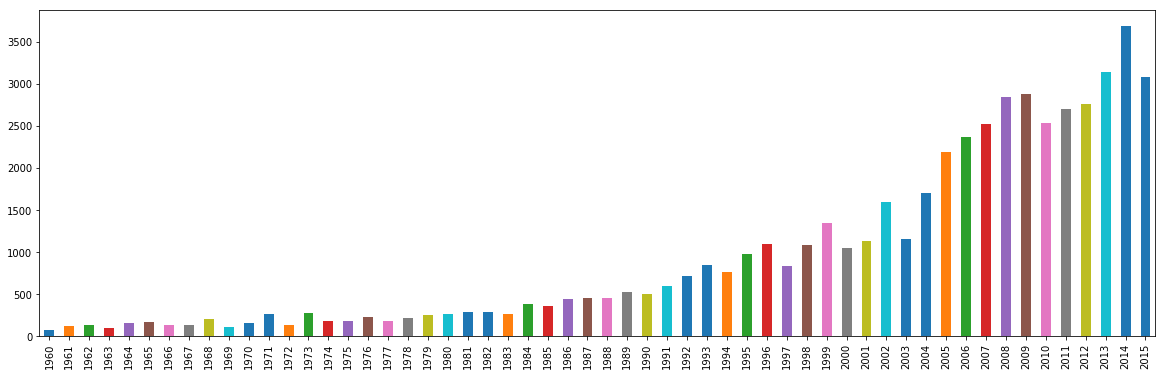

In [67]:
# plot how many drama movies released each year
df[df['genres'] == "Drama"].release_year.value_counts().sort_index().plot(kind='bar',figsize=(20,6));

***Comedy genre popularity over years from 1960 to 2015***

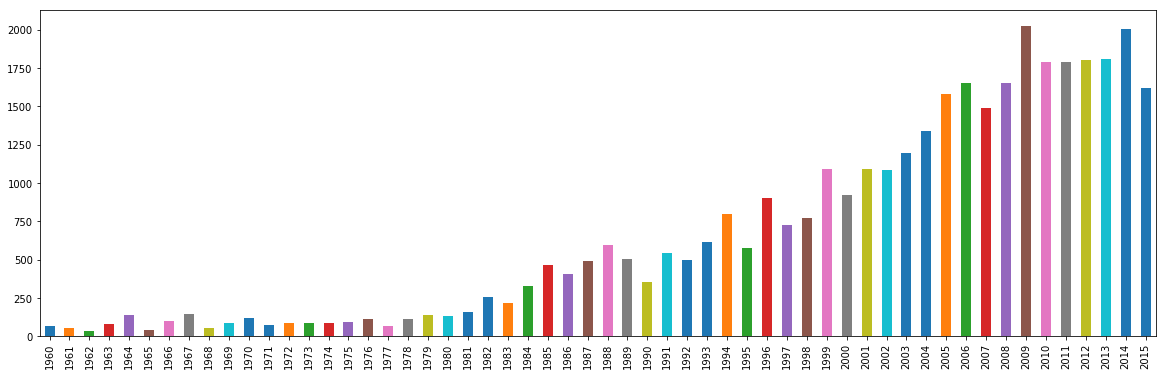

In [68]:
# show how many Comedy movies released each year
df[df['genres'] == "Comedy"].release_year.value_counts().sort_index().plot(kind='bar',figsize=(20,6));

In [69]:
# what is the year that Comedy movies released in the most ?
df[df['genres'] == "Comedy"].release_year.value_counts().idxmax()

2009

***Thriller genre popularity over years from 1960 to 2015***

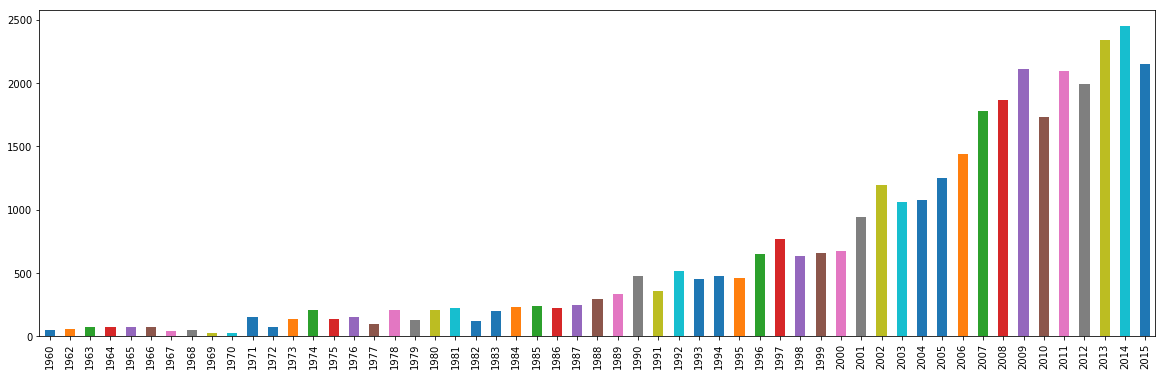

In [70]:
# show how many Thriller movies released each year
df[df['genres'] == "Thriller"].release_year.value_counts().sort_index().plot(kind='bar',figsize=(20,6));

In [71]:
# what is the year that Thriller movies released in the most ?
df[df['genres'] == "Thriller"].release_year.value_counts().idxmax()

2014

In [72]:
# what is the year that has the least of Thriller movies  ?
df[df['genres'] == "Thriller"].release_year.value_counts().idxmin()

1969

***Action genre popularity over years from 1960 to 2015***

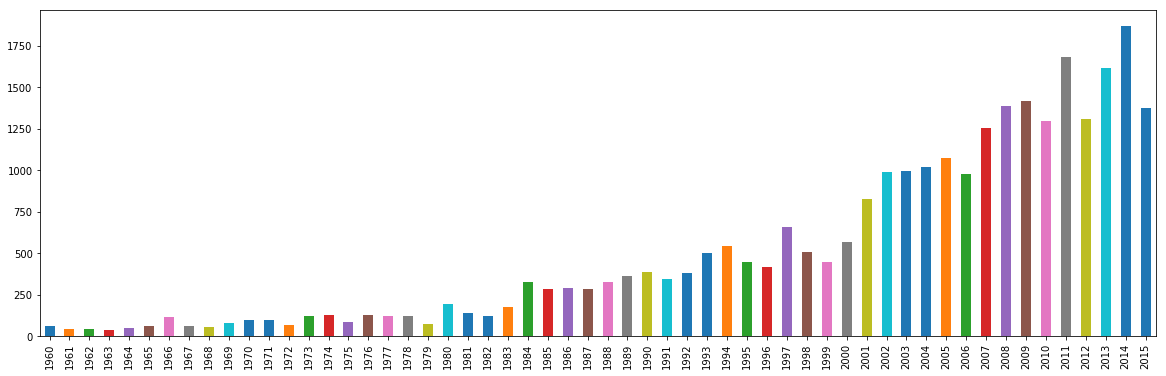

In [73]:
# show how many Action movies released each year
df[df['genres'] == "Action"].release_year.value_counts().sort_index().plot(kind='bar',figsize=(20,6));

***Romance genre popularity over years from 1960 to 2015***

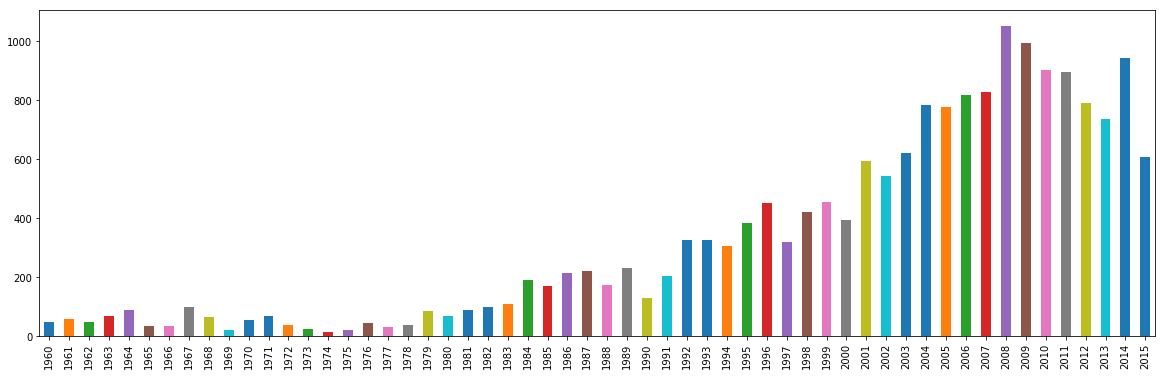

In [74]:
# show how many Romance movies released each year
df[df['genres'] == "Romance"].release_year.value_counts().sort_index().plot(kind='bar',figsize=(20,6));

<a id="ans4"></a>
### Research Question 4  (  What are the romantic and action movies that Jason Statham has role in them ? )

Let's see what movies in this dataset have Jason Statham as one of the cast

In [75]:
# find all Jason Statham movies
df[df['cast'] == 'Jason Statham'].groupby('original_title')['original_title'].count()

original_title
13                                               10
Blitz                                            15
Cellular                                          4
Chaos                                            15
Crank                                            12
Crank: High Voltage                               9
Death Race                                       15
Furious 7                                        15
Ghosts of Mars                                    9
Homefront                                         4
In the Name of the King: A Dungeon Siege Tale    12
Killer Elite                                     15
Lock, Stock and Two Smoking Barrels              10
London                                           12
Parker                                            2
Redemption                                        2
Revolver                                         20
Safe                                             15
Snatch                                           

In [76]:
# find all Jason Statham  Action movies
action = df[(df['cast'] == 'Jason Statham') & (df['genres'] == 'Action')]
# find all Jason Statham  Romance movies
romance = df[(df['cast'] == 'Jason Statham') & (df['genres'] == 'Romance')]
# apply inner join between two dataframes
romance.merge(action,on='id').groupby('id')['original_title_x'].value_counts()

id    original_title_x
7515  London              16
Name: original_title_x, dtype: int64

So answer is **London** movie , let's see its data

In [77]:
movie_df[movie_df['original_title'] == 'London']

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
6310,7515,0.622677,0,0,London,Chris Evans|Jessica Biel|Joy Bryant|Jason Stat...,Hunter Richards,92,Drama|Action|Romance,Destination Films|Silver Nitrate Films|Nationa...,2/10/05,52,5.7,2005,0.0,0.0,0


So this movie released in 2005 and was directed by Hunter Richards

<a id="ans5"></a>
### Research Question 5  (  What are the production companies and the cast of the top 10 popular romance/action movies ? )

In [78]:
# find top 10 popular romantic movies
romantic = df[df['genres'] == 'Romance'].sort_values('popularity',ascending=False).original_title.unique().tolist()
romantic[:10]

['Forrest Gump',
 'Cinderella',
 'Fifty Shades of Grey',
 'Titanic',
 'Bridget Jones: The Edge of Reason',
 'Her',
 'Silver Linings Playbook',
 'Eternal Sunshine of the Spotless Mind',
 'Beauty and the Beast',
 'Maleficent']

from 1547 romantic movies in this dataset here are the top 10 by popularity

In [79]:
# find top 10 popular action movies
action = df[df['genres'] == 'Action'].sort_values('popularity',ascending=False).original_title.unique().tolist()
action[:10]

['Jurassic World',
 'Mad Max: Fury Road',
 'Guardians of the Galaxy',
 'Captain America: The Winter Soldier',
 'Star Wars',
 'John Wick',
 'Star Wars: The Force Awakens',
 'Avatar',
 'Inception',
 'Furious 7']

from 2192 action movies in this dataset here are the top 10 by popularity

**Now let's find top 10 romantic and action movies at the same time**

In [130]:
# find all action movies
action = df[df['genres'] == 'Action']

In [131]:
# find all romantic movies
romantic = df[df['genres'] == 'Romance']

In [132]:
# let's merge these dataframe using inner join
romantic_action_movies = action.merge(romantic,on='id')

In [133]:
# let's see each movie with its popularity
rom_act = romantic_action_movies[['id','original_title_x','popularity_x','gross_profit_x']].rename(lambda x:x.replace("_x",""),axis=1).drop_duplicates()

In [134]:
# show the count of these movies
rom_act.shape

(110, 4)

We have 110 romantic/action movies in this dataset

In [135]:
# let's sort their popularity (most popular come first)
rom_act.sort_values('popularity',ascending=False,inplace=True)

Now let's visualize top 10 movies ( romantic and action movies at the same time )

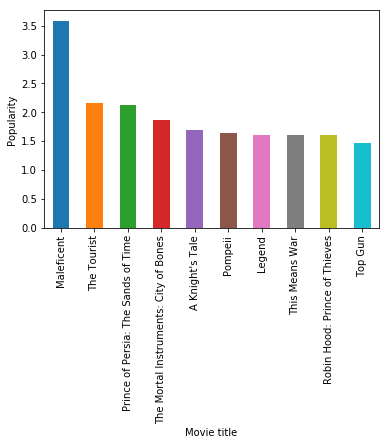

In [136]:
# visualize top 10 movies based on popularity ( romantic and action movies at the same time )
rom_act = rom_act.iloc[:10]
rom_act.plot(kind='bar',x= 'original_title',y='popularity',legend=False)
plt.ylabel('Popularity')
plt.xlabel('Movie title');

In [137]:
# let's take a look at gross profit of these 10 movies
sort_by_gross_profit(rom_act)

,id,original_title,popularity,gross_profit
19441,102651,Maleficent,3.582315,578410378
20391,8367,Robin Hood: Prince of Thieves,1.606765,342493908
19416,744,Top Gun,1.469796,341830601
19541,9543,Prince of Persia: The Sands of Time,2.128799,185154643
1516,37710,The Tourist,2.162441,178346189
20616,9476,A Knight's Tale,1.692141,52487473
7441,123553,The Mortal Instruments: City of Bones,1.875017,30565421
8366,11976,Legend,1.613752,-9497888
625,76649,Pompeii,1.638781,-12168369
5716,59962,This Means War,1.612069,-65000000


In [95]:
# get a list of these 10 movies IDs
mov_list = rom_act.iloc[:10,0].tolist()

In [96]:
# show their info
movie_df[movie_df['id'].isin(mov_list)].sort_values('popularity',ascending=False)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
660,102651,3.582315,180000000,758410378,Maleficent,Angelina Jolie|Elle Fanning|Juno Temple|Sharlt...,Robert Stromberg,97,Fantasy|Adventure|Action|Family|Romance,Walt Disney Pictures|Roth Films,5/28/14,2928,7.0,2014,1.657964e+08,6.985650e+08,578410378
1936,37710,2.162441,100000000,278346189,The Tourist,Johnny Depp|Angelina Jolie|Paul Bettany|Timoth...,Florian Henckel von Donnersmarck,103,Action|Thriller|Romance,Spyglass Entertainment|Peninsula Films|StudioC...,12/8/10,1084,6.0,2010,1.000000e+08,2.783462e+08,178346189
1937,9543,2.128799,150000000,335154643,Prince of Persia: The Sands of Time,Jake Gyllenhaal|Gemma Arterton|Ben Kingsley|Al...,Mike Newell,116,Adventure|Fantasy|Action|Romance,Walt Disney Pictures|Jerry Bruckheimer Films,5/19/10,1545,6.1,2010,1.500000e+08,3.351546e+08,185154643
5464,123553,1.875017,60000000,90565421,The Mortal Instruments: City of Bones,Lily Collins|Jamie Campbell Bower|Kevin Zegers...,Harald Zwart,130,Action|Adventure|Drama|Mystery|Romance,Constantin Film Produktion|Don Carmody Product...,8/21/13,1020,6.2,2013,5.616200e+07,8.477225e+07,30565421
2656,9476,1.692141,65000000,117487473,A Knight's Tale,Heath Ledger|Rufus Sewell|Shannyn Sossamon|Pau...,Brian Helgeland,132,Adventure|Drama|Romance|Action,Columbia Pictures Corporation|Escape Artists|B...,5/11/01,521,6.5,2001,8.004673e+07,1.446844e+08,52487473
722,76649,1.638781,130000000,117831631,Pompeii,Kit Harington|Carrie-Anne Moss|Emily Browning|...,Paul W.S. Anderson,105,Action|Adventure|History|Romance|Drama,Impact Pictures|TriStar Pictures|Don Carmody P...,2/18/14,837,5.1,2014,1.197418e+08,1.085337e+08,-12168369
6086,11976,1.613752,25000000,15502112,Legend,Tom Cruise|Mia Sara|Tim Curry|David Bennent|Al...,Ridley Scott,114,Action|Adventure|Fantasy|Romance,Universal Studios|Twentieth Century Fox Film C...,7/19/85,120,6.3,1985,5.067915e+07,3.142536e+07,-9497888
4408,59962,1.612069,65000000,0,This Means War,Reese Witherspoon|Chris Pine|Tom Hardy|Laura V...,McG,103,Action|Comedy|Romance,Overbrook Films|Robert Simonds Productions,2/14/12,1011,5.9,2012,6.173338e+07,0.000000e+00,-65000000
9319,8367,1.606765,48000000,390493908,Robin Hood: Prince of Thieves,Kevin Costner|Morgan Freeman|Christian Slater|...,Kevin Reynolds,143,Adventure|Drama|Action|Romance,Warner Bros.|Morgan Creek Productions,6/14/91,518,6.5,1991,7.685246e+07,6.252170e+08,342493908
10475,744,1.469796,15000000,356830601,Top Gun,Tom Cruise|Kelly McGillis|Val Kilmer|Anthony E...,Tony Scott,110,Drama|Action|Romance,Paramount Pictures,5/16/86,1046,6.6,1986,2.984110e+07,7.098811e+08,341830601


In [97]:
# find production companies of these movies
production_camp = df[df['id'].isin(mov_list)][['id','original_title','production_companies']].drop_duplicates()
production_camp['production_companies'].value_counts()

Walt Disney Pictures                      2
Don Carmody Productions                   2
Impact Pictures                           1
Escape Artists                            1
Embassy International Pictures            1
Black and Blu Entertainment               1
StudioCanal                               1
Morgan Creek Productions                  1
Constantin Film Produktion                1
Paramount Pictures                        1
TriStar Pictures                          1
Spyglass Entertainment                    1
FilmDistrict                              1
Unique Features                           1
Twentieth Century Fox Film Corporation    1
Legend Production Company                 1
Universal Studios                         1
Warner Bros.                              1
Columbia Pictures Corporation             1
GK Films                                  1
Peninsula Films                           1
Finestkind                                1
Mr. Smith Productions           

So **Don Carmody Productions** and **Walt Disney Pictures** each one of them have **produced 2 movies** of these top 10 romantic and action movies and **each of other companies** has produced **only one movie** in this list

In [98]:
# let's see what movies Don Carmody Productions has produced 
production_camp[production_camp['production_companies'] == 'Don Carmody Productions']

,id,original_title,production_companies
27962,123553,The Mortal Instruments: City of Bones,Don Carmody Productions
41255,76649,Pompeii,Don Carmody Productions


In [99]:
# let's see what movies Walt Disney Pictures has produced
production_camp[production_camp['production_companies'] == 'Walt Disney Pictures']

,id,original_title,production_companies
589,102651,Maleficent,Walt Disney Pictures
1740,9543,Prince of Persia: The Sands of Time,Walt Disney Pictures


let's **visualize these production companies and how many movies each one produced is this top list**

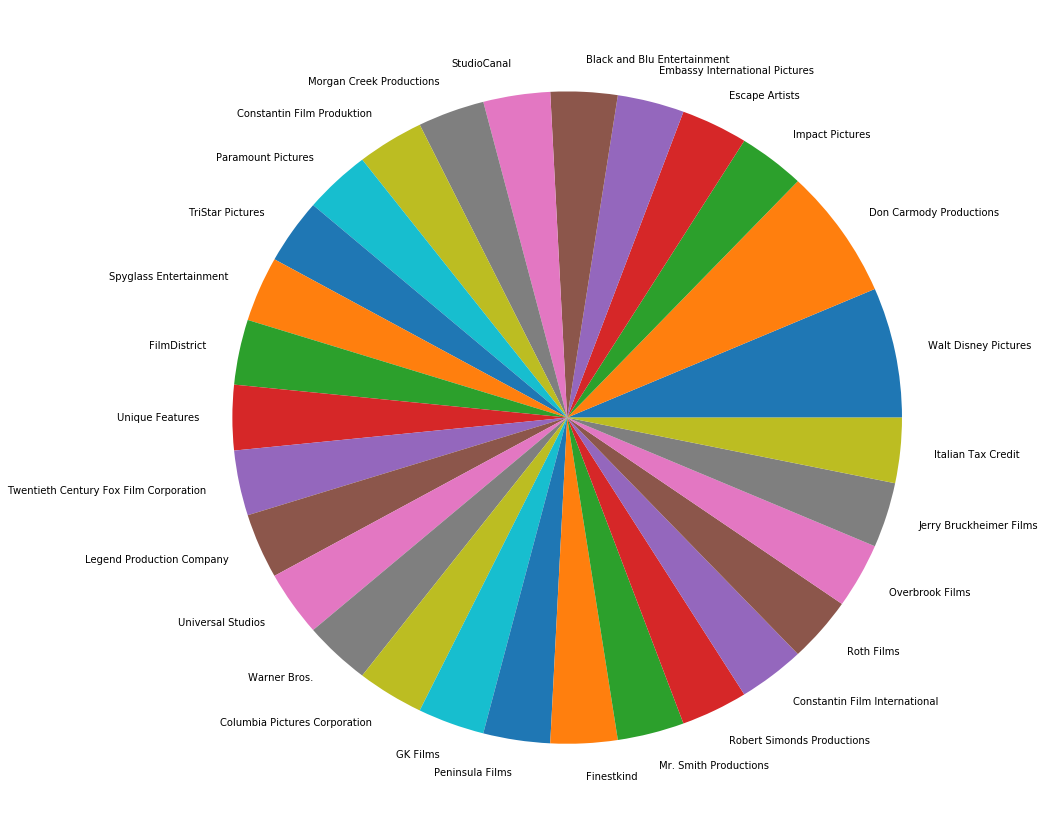

In [100]:
plt.axis('off')
production_camp['production_companies'].value_counts().plot(kind='pie',figsize=(15,15));

In [101]:
# find the cast of these movies
actors = df[df['id'].isin(mov_list)][['id','original_title','cast']].drop_duplicates()
actors['cast'].value_counts()

Angelina Jolie                 2
Paul Bettany                   2
Tom Cruise                     2
Carrie-Anne Moss               1
Kit Harington                  1
Ben Kingsley                   1
Emily Browning                 1
Jemima West                    1
Shannyn Sossamon               1
Alan Rickman                   1
Jessica Lucas                  1
Alfred Molina                  1
Sharlto Copley                 1
Christian Slater               1
Timothy Dalton                 1
Reese Witherspoon              1
Laura Vandervoort              1
Laura Fraser                   1
Tom Hardy                      1
Jake Gyllenhaal                1
Steve Toussaint                1
Kelly McGillis                 1
Val Kilmer                     1
Kevin Costner                  1
Anthony Edwards                1
Johnny Depp                    1
Mary Elizabeth Mastrantonio    1
David Bennent                  1
Isobelle Molloy                1
Mia Sara                       1
Gemma Arte

So **Paul Bettany, Angelina Jolie and Tom Cruise** each of these actors has a role in **2 different movies** in this top list, and **all other actors** acted in **only one** of these movies

In [102]:
# find Angelina Jolie movies in this list
actors[actors['cast'] == 'Angelina Jolie']

,id,original_title,cast
589,102651,Maleficent,Angelina Jolie
60700,37710,The Tourist,Angelina Jolie


so **Angelina Jolie** has acted in **Maleficent** and **The Tourist**

In [103]:
# find Tom Cruise movies in this list
actors[actors['cast'] == 'Tom Cruise']

,id,original_title,cast
5382,11976,Legend,Tom Cruise
9403,744,Top Gun,Tom Cruise


so **Tom Cruise** has a role in **Legend** and **Top Gun**

In [104]:
# find Paul Bettany movies in this list
actors[actors['cast'] == 'Paul Bettany']

,id,original_title,cast
119661,37710,The Tourist,Paul Bettany
179260,9476,A Knight's Tale,Paul Bettany


so **Paul Bettany** has acted in **The Tourist** and **A Knight's Tale**

let's **visualize the actors in these top 10 romantic/action movies and the count of movies each one has a role in**

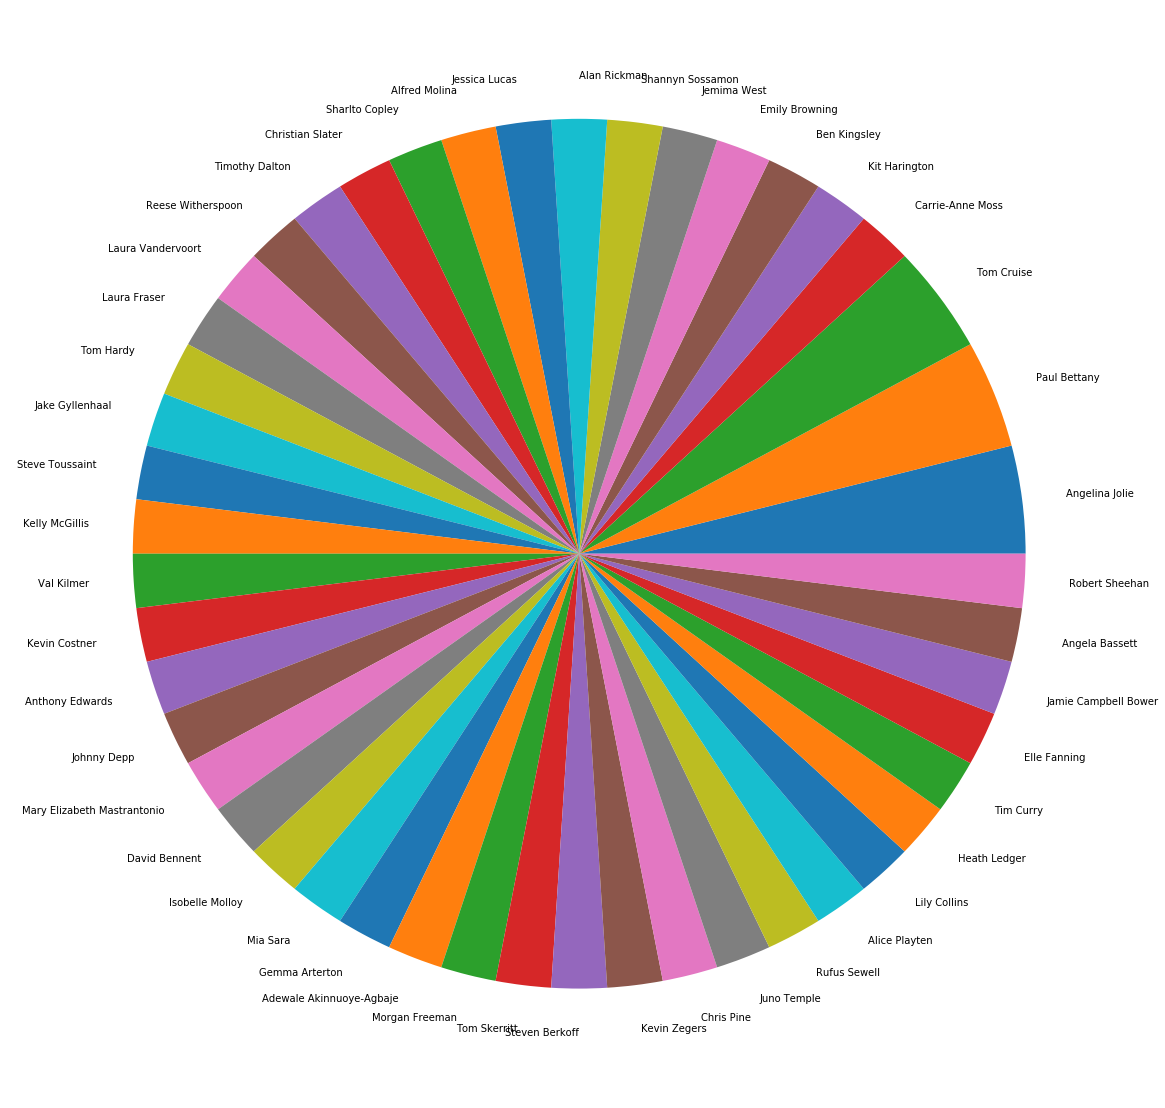

In [105]:
plt.axis('off')
actors['cast'].value_counts().plot(kind='pie',figsize=(20,20));

<a id="ans6"></a>
### Research Question 6  ( What kinds of properties are associated with movies that have high revenues? )

In [106]:
# let's have a look at the description of the dataset
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9.772000e+03
mean,63189.640810,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07,2.805154e+07
std,90718.059987,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08,1.014445e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10221.500000,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00,0.000000e+00
75%,70577.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07,1.420195e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


#### let's see why the the minimum of revenue is zero

In [108]:
# show movies that has zero revenue
zero_revenue = movie_df[movie_df.revenue == 0]
zero_revenue.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0,-30000000
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0,-20000000
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0,0
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0,0
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0,0


In [109]:
# show summary statistics
zero_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
count,5022.000000,5022.000000,5.022000e+03,5022.0,5022.000000,5022.000000,5022.000000,5022.000000,5.022000e+03,5022.0,5.022000e+03
mean,80970.754082,0.347415,2.988707e+06,0.0,97.987256,44.923138,5.786420,2000.925926,3.897720e+06,0.0,-2.988707e+06
std,102006.753149,0.283305,9.528567e+06,0.0,32.259711,72.480442,0.978921,14.242924,1.232904e+07,0.0,9.528567e+06
min,17.000000,0.000188,0.000000e+00,0.0,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.0,-1.500000e+08
25%,13770.000000,0.166792,0.000000e+00,0.0,88.000000,14.000000,5.200000,1994.000000,0.000000e+00,0.0,0.000000e+00
50%,27329.000000,0.282134,0.000000e+00,0.0,95.000000,22.000000,5.800000,2007.000000,0.000000e+00,0.0,0.000000e+00
75%,113519.000000,0.442833,0.000000e+00,0.0,106.000000,45.000000,6.500000,2012.000000,0.000000e+00,0.0,0.000000e+00
max,414419.000000,3.280948,1.500000e+08,0.0,877.000000,1143.000000,8.700000,2015.000000,1.500000e+08,0.0,0.000000e+00


We have 5022 movies (around the half of the dataset) has revenue of zero, so let's check their popularity

In [110]:
# sort these movies on popularity
zero_revenue.sort_values('popularity',ascending=False)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
667,72784,3.280948,13000000,0,The Loft,Karl Urban|James Marsden|Wentworth Miller|Matt...,Erik Van Looy,108,Thriller,Dark Castle Entertainment|Anonymous Content|Op...,10/14/14,291,6.4,2014,1.197418e+07,0.0,-13000000
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0,-30000000
688,256092,2.493306,12000000,0,Drive Hard,Thomas Jane|John Cusack|Zoe Ventoura|Damien Ga...,Brian Trenchard-Smith,96,Action|Comedy|Crime,Odyssey Media|Silver Wings Films,5/26/14,52,4.0,2014,1.105309e+07,0.0,-12000000
5237,25571,2.407266,3500000,0,Drive,Mark Dacascos|Kadeem Hardison|John Pyper-Fergu...,Steve Wang,100,Action|Adventure|Science Fiction|Comedy,Overseas FilmGroup,8/4/97,10,6.3,1997,4.754611e+06,0.0,-3500000
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0,-20000000
10439,9078,2.180410,0,0,The Sword in the Stone,Sebastian Cabot|Karl Swenson|Junius Matthews|N...,Wolfgang Reitherman,79,Animation|Family,Walt Disney Productions,12/25/63,486,6.7,1963,0.000000e+00,0.0,0
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0,0
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0,0
702,262543,2.103532,7000000,0,AutÃ³mata,Antonio Banderas|Birgitte Hjort SÃ¸rensen|Dyla...,Gabe IbÃ¡Ã±ez,110,Thriller|Science Fiction,Green Moon Productions|Nu Boyana Viburno,10/9/14,436,5.4,2014,6.447637e+06,0.0,-7000000
8975,9732,2.090322,0,0,The Lion King 2: Simba's Pride,Matthew Broderick|Moira Kelly|Neve Campbell|Li...,Darrell Rooney,81,Animation|Family|Adventure,Walt Disney Pictures|Walt Disney Animation Aus...,10/24/98,553,6.6,1998,0.000000e+00,0.0,0


I searched for the revenue of **the loft** movie and I found that this movie has a revenue of $11,020,402 <a href="https://en.wikipedia.org/wiki/The_Loft_(film)">Check this wikipedia page</a>, so apperently this dataset has errors

In [112]:
# show top 1000 revenue movies
top_mov = movie_df.sort_values('revenue',ascending=False).iloc[:1000,:]
top_mov

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
4361,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,1299557910
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,1125035767
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09,1202817822
5422,109445,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09,1124219009
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09,1015439994


In [113]:
# let's see the statistical description of these top movies
top_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,37483.849000,2.274947,7.695619e+07,3.134975e+08,116.42700,1311.990000,6.395000,2003.463000,8.572989e+07,3.781601e+08,2.365413e+08
std,63898.954761,2.294935,5.606842e+07,2.451242e+08,28.30657,1316.648471,0.704252,9.287028,5.579201e+07,2.982338e+08,2.185099e+08
min,11.000000,0.131526,0.000000e+00,1.221959e+08,72.00000,14.000000,4.200000,1961.000000,0.000000e+00,1.126200e+08,-2.403752e+07
25%,1597.750000,1.108935,3.500000e+07,1.627824e+08,99.00000,427.000000,5.900000,1998.000000,4.288138e+07,1.930378e+08,1.111017e+08
50%,9527.500000,1.663779,6.500000e+07,2.266639e+08,114.00000,846.500000,6.400000,2005.000000,7.605186e+07,2.771007e+08,1.619937e+08
75%,44919.750000,2.630447,1.050000e+08,3.620530e+08,129.00000,1706.750000,6.900000,2011.000000,1.180406e+08,4.494090e+08,2.778136e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.00000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.544506e+09


These top 1000 revenue movies have :
* a mean of around **76956190 in budget**

* a mean of around **6.39 in vote average**

* a mean of around **313497465 in revenue**

* a mean of around **116.42 in runtime** 

* a minimum of **4.2 in vote average**

* a minimum of **72 in runtime**

In [114]:
# let's check the directors of these movies
top_mov['director'].value_counts()

Steven Spielberg                           23
Robert Zemeckis                            12
Michael Bay                                10
Tony Scott                                 10
Tim Burton                                  9
Ridley Scott                                9
Clint Eastwood                              9
Ron Howard                                  9
Roland Emmerich                             8
Brett Ratner                                8
David Fincher                               7
Gore Verbinski                              7
Peter Jackson                               7
Dennis Dugan                                7
Chris Columbus                              7
M. Night Shyamalan                          7
Jon Turteltaub                              7
Steven Soderbergh                           7
Raja Gosnell                                6
Shawn Levy                                  6
Oliver Stone                                6
Martin Scorsese                   

**Steven Spielberg** has directed **23** out of these movies

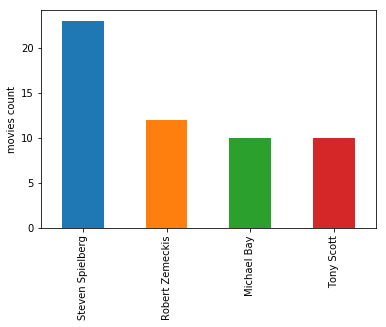

In [115]:
# visualize the top 4 directors of these top-revenue movies
plt.ylabel('movies count')
top_mov['director'].value_counts().iloc[:4].plot(kind="bar");

Now let's check the genres of these movies

In [116]:
# get the IDs of these movies into a list
ids_top = top_mov['id'].tolist()

In [117]:
# find the genres of these 1000 movies
genres_of_top = df[df['id'].isin(ids_top)][['id','original_title','genres']].drop_duplicates()['genres'].value_counts()
genres_of_top

Action             396
Comedy             357
Adventure          346
Drama              328
Thriller           291
Family             202
Science Fiction    184
Fantasy            181
Romance            152
Crime              138
Animation          118
Mystery             82
Horror              62
War                 38
Music               32
History             27
Western             14
Name: genres, dtype: int64

 **Interesting !**  396 out of these 1000 movies are from **the Action** genre

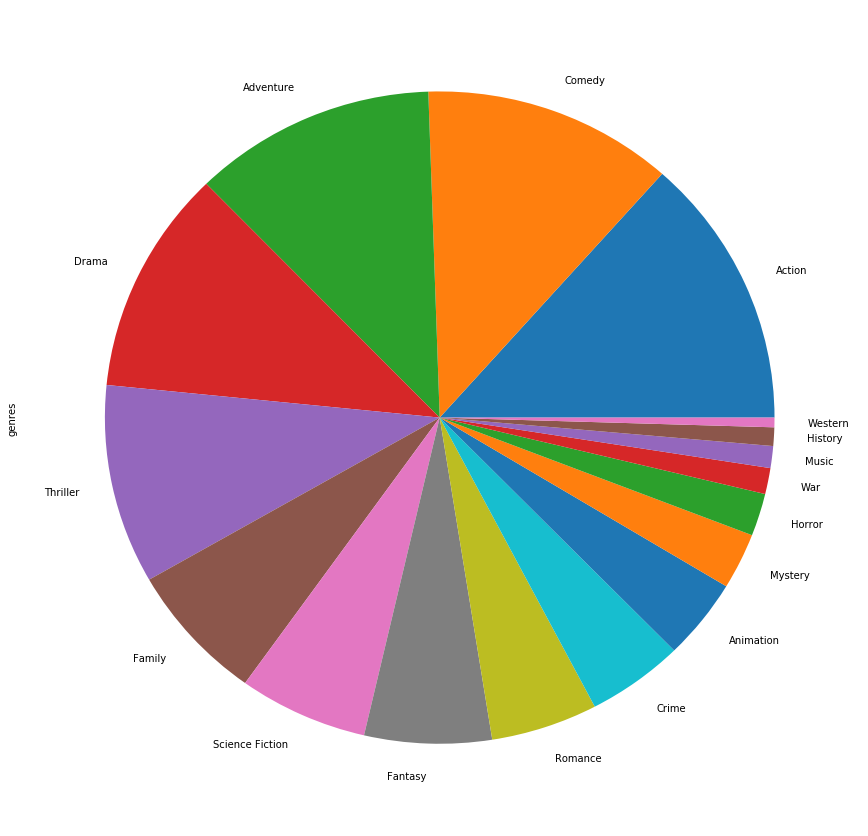

In [118]:
# visualize the genres of these top-revenue movies
genres_of_top.plot(kind='pie',figsize=(15,15));

In [119]:
# find the production companies of these 1000 movies
top_prod = df[df['id'].isin(ids_top)][['id','original_title','production_companies']].drop_duplicates()['production_companies'].value_counts()
top_prod

Warner Bros.                                                       131
Universal Pictures                                                 130
Paramount Pictures                                                 104
Twentieth Century Fox Film Corporation                             100
Columbia Pictures                                                   76
Walt Disney Pictures                                                68
New Line Cinema                                                     47
DreamWorks SKG                                                      42
Relativity Media                                                    39
Columbia Pictures Corporation                                       38
Amblin Entertainment                                                38
Touchstone Pictures                                                 37
Village Roadshow Pictures                                           32
Metro-Goldwyn-Mayer (MGM)                                           28
Dune E

Only **four companies** have produced **465** out of these movies
* Warner Bros.  has produced                             131 movies
* Universal Pictures  has produced                       130 movies
* Paramount Pictures  has produced                       104 movies
* Twentieth Century Fox Film Corporation  has produced   100 movies

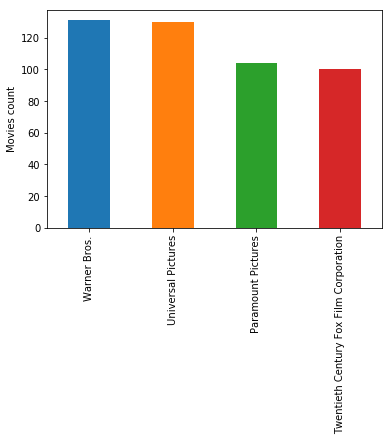

In [120]:
# visualize the top 4 production companies of these top-revenue movies
plt.ylabel("Movies count")
top_prod.iloc[:4].plot(kind='bar');

<a id='conclusions'></a>
## Conclusions
After performing all the analysis here is my answers for questions that were proposed earlier, I found that :
* **Jurassic World** is **the most popular movie in this dataset** and the one that **ranked 5th** in top movies that have revenue and its genres are Action, Adventure, Science Fiction and Thriller.



* Movies in this dataset after cleaning it, **released from 1960 to 2015** and **2014 is the top release-year** for this dataset.



* **20  different genres of movies** are found and the **top 5 genres for movies** are **Drama, Comedy, Thriller, Action and Romance** (have more movies than the others).



* **Jason Statham** has a role in **London (2005)** which categorized as **romantic and action movie**, this movie was directed by Hunter Richards.


* I found **110 romantic & action movies** in this dataset, **Maleficent** is the most popular romantic/action movie.
  * Out of the top 10 romantic & action movies, two companies namely **Don Carmody Productions** and **Walt Disney Pictures** each one of them has **produced 2 movies**.
  
  * **Paul Bettany, Angelina Jolie and Tom Cruise** each of these actors have a role in **2 different movies** in this top list.
  
  

* I found the top 1000 revenue movies have these properties :
  
 * a mean of around **76956190 in budget**

 * a mean of around **6.39 in vote average**

 * a mean of around **313497465 in revenue**

 * a mean of around **116.42 in runtime** 

 * a minimum of **4.2 in vote average**

 * a minimum of **72 in runtime**
 
 * **Steven Spielberg** has directed 23 out of these movies
 
 * **396 out of these 1000** movies are from **the Action genre**
 
 * Only **four companies** have produced **465** out of these movies namely:
       * Warner Bros.  has produced                             131 movies
       * Universal Pictures  has produced                       130 movies
       * Paramount Pictures  has produced                       104 movies
       * Twentieth Century Fox Film Corporation  has produced   100 movies
       
## limitations      
The preceding formula or the properties of top 1000 movies and also answers to the questions is not completely true because, at the first look, I found that budget, revenue and runtime features have a minimum of zero which doesn't make sense especially for runtime and budget (around the half of dataset has revenue of zero).

And with further investigation, I found that one of the movies that have zero revenue in the dataset, actually has a revenue of $11,020,402 according to <a href="https://en.wikipedia.org/wiki/The_Loft_(film)">this page</a>, so I think there are a lot of errors in this dataset and these errors may happen at data ingestion phase and I think these errors surely affect our analysis and conclusions.

Adding to these limitations I found missing data in the cast, director, genres and mostly in production companies feature, so I had to drop these rows which also affect our analysis also I found that dataset is biased to recent years, with recent years has more movies than older years.

I found also that revenue and budget have no currency unit and this is a problem as these movies have different production companies and being produced in different countries.
Also, we don't know how the popularity of these movies is calculated and from what sources votes are collected to take their average.


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0